In [341]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [342]:
import spacy
spacy.cli.download("en_core_web_sm")
nlp=spacy.load("en_core_web_sm")
text="Hello, how are you?"
doc=nlp(text)

for tokens in doc:
    print(tokens.text,tokens.pos_)

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Hello INTJ
, PUNCT
how SCONJ
are AUX
you PRON
? PUNCT


In [343]:

pd.set_option('display.max_colwidth',None)

try:
    df=pd.read_csv('/home/one/sAT/dogs.csv')
except:
    print("Error in reading the file")

print('first 5 rows of data')
display(df.head())
print(df.info())

first 5 rows of data


,Unnamed: 0,Dog Breed Group,Height,Weight,Life Span,Adaptability,Adapts Well To Apartment Living,Good For Novice Owners,Sensitivity Level,Tolerates Being Alone,...,Potential For Mouthiness,Prey Drive,Tendency To Bark Or Howl,Wanderlust Potential,Physical Needs,Energy Level,Intensity,Exercise Needs,Potential For Playfulness,Detailed Description Link
0,Afador,Mixed Breed Dogs,20 to 29 inches,50 to 75 pounds,10 to 12 years,NaN,1,1,3,3,...,4,4.0,4.0,4,NaN,4,4,4,3,https://dogtime.com/dog-breeds/afador
1,Affenhuahua,Mixed Breed Dogs,6 to 12 inches,4 to 12 pounds,13 to 18 years,NaN,4,4,4,1,...,4,2.0,4.0,2,NaN,4,3,3,3,https://dogtime.com/dog-breeds/affenhuahua
2,Affenpinscher,Companion Dogs,9 to 11 inches tall at the shoulder,7 to 9 pounds,12 to 14 years,NaN,5,4,3,1,...,4,3.0,2.0,2,NaN,4,3,3,4,https://dogtime.com/dog-breeds/affenpinscher
3,Afghan Hound,Hound Dogs,24 to 26 inches tall at the shoulder,50 to 60 pounds,10 to 12 years,NaN,5,3,5,2,...,3,5.0,2.0,5,NaN,5,2,4,4,https://dogtime.com/dog-breeds/afghan-hound
4,Airedale Terrier,Terrier Dogs,21 to 23 inches tall at the shoulder,40 to 65 pounds,10 to 13 years,NaN,1,2,3,2,...,5,5.0,4.0,4,NaN,5,3,5,5,https://dogtime.com/dog-breeds/airedale-terrier


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       392 non-null    object 
 1   Dog Breed Group                  392 non-null    object 
 2   Height                           389 non-null    object 
 3   Weight                           385 non-null    object 
 4   Life Span                        392 non-null    object 
 5   Adaptability                     0 non-null      float64
 6   Adapts Well To Apartment Living  392 non-null    int64  
 7   Good For Novice Owners           392 non-null    int64  
 8   Sensitivity Level                392 non-null    int64  
 9   Tolerates Being Alone            392 non-null    int64  
 10  Tolerates Cold Weather           392 non-null    int64  
 11  Tolerates Hot Weather            392 non-null    int64  
 12  All Around Friendlines

In [344]:
# Remove rows with missing values in key features
print("Original dataset size:", len(df))
df_clean = df.dropna(subset=['Energy Level', 'Intensity', 'Exercise Needs', 'Potential For Playfulness',
                            'Easy To Train', 'Intelligence', 'Kid-Friendly', 'Dog Friendly'])
print("After removing missing values:", len(df_clean))

# Use the cleaned dataset
df = df_clean.copy()

Original dataset size: 392
After removing missing values: 392


In [345]:
def process(text):
    text=re.sub(r'<.#?>'," ",text)
    text=text.lower()
    text=re.sub(r"[^a-z0-9]"," ",text)
    tokenize=word_tokenize(text)
    tokens=[word for word in tokenize if word not in stopwords.words('english')]
    text=" ".join(tokens)
    doc=nlp(text)
    lemitize=[token.lemma_ for token in doc]
    return ' '.join(lemitize)

In [346]:
print('processing some lines')
df = df.sample(min(300, len(df))).copy()
df['cleaned_breed'] = df['Unnamed: 0'].apply(process)
print("cleaned vs origional")
print(df[['Unnamed: 0','cleaned_breed']].head())

processing some lines


cleaned vs origional
             Unnamed: 0       cleaned_breed
310  Portuguese Pointer  portuguese pointer
290             Papipoo             papipoo
140            Cockapoo            cockapoo
119             Cheagle             cheagle
139           Cockalier           cockalier


In [347]:
# Use more features for better prediction
features_expanded = [
    'Energy Level', 'Intensity', 'Exercise Needs', 'Potential For Playfulness',
    'Easy To Train', 'Intelligence', 'Kid-Friendly', 'Dog Friendly',
    'Affectionate With Family', 'Friendly Toward Strangers', 'Amount Of Shedding',
    'Easy To Groom', 'General Health', 'Potential For Weight Gain', 'Size',
    'Potential For Mouthiness', 'Tendency To Bark Or Howl', 'Wanderlust Potential'
]

X = df[features_expanded]
y = df['Dog Breed Group']

In [348]:
# Handle missing values in features
print("Missing values in features before cleaning:")
print(X.isnull().sum())

# Fill missing values with median for each feature
X = X.fillna(X.median())

print("\nMissing values in features after cleaning:")
print(X.isnull().sum())

# Also check target variable
print(f"\nMissing values in target (y): {y.isnull().sum()}")
if y.isnull().sum() > 0:
    y = y.dropna()
    X = X.loc[y.index]  # Keep only rows where y is not null
    print(f"Removed {y.isnull().sum()} rows with missing target values")

print(f"\nFinal dataset shape: X={X.shape}, y={y.shape}")

Missing values in features before cleaning:
Energy Level                 0
Intensity                    0
Exercise Needs               0
Potential For Playfulness    0
Easy To Train                0
Intelligence                 0
Kid-Friendly                 0
Dog Friendly                 0
Affectionate With Family     0
Friendly Toward Strangers    0
Amount Of Shedding           0
Easy To Groom                0
General Health               0
Potential For Weight Gain    0
Size                         0
Potential For Mouthiness     0
Tendency To Bark Or Howl     0
Wanderlust Potential         0
dtype: int64

Missing values in features after cleaning:
Energy Level                 0
Intensity                    0
Exercise Needs               0
Potential For Playfulness    0
Easy To Train                0
Intelligence                 0
Kid-Friendly                 0
Dog Friendly                 0
Affectionate With Family     0
Friendly Toward Strangers    0
Amount Of Shedding           0


In [349]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [350]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.2833333333333333


In [351]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [352]:
# Example: Predict for friendliness=5, energy_level=4, lifespan=13, trainability=4, shedding=2, barking=3
# Example: Predict with expanded features
input_data = pd.DataFrame({
    'Energy Level': [4],
    'Intensity': [3],
    'Exercise Needs': [4],
    'Potential For Playfulness': [4],
    'Easy To Train': [4],
    'Intelligence': [4],
    'Kid-Friendly': [5],
    'Dog Friendly': [5],
    'Affectionate With Family': [4],
    'Friendly Toward Strangers': [3],
    'Amount Of Shedding': [2],
    'Easy To Groom': [3],
    'General Health': [4],
    'Potential For Weight Gain': [3],
    'Size': [3],
    'Potential For Mouthiness': [2],
    'Tendency To Bark Or Howl': [3],
    'Wanderlust Potential': [3]
})

input_data_scaled = scaler.transform(input_data)
input_data_scaled_df = pd.DataFrame(input_data_scaled, columns=features_expanded)
predicted_group = clf.predict(input_data_scaled_df)
print("Predicted group:", predicted_group[0])

Predicted group: Mixed Breed Dogs


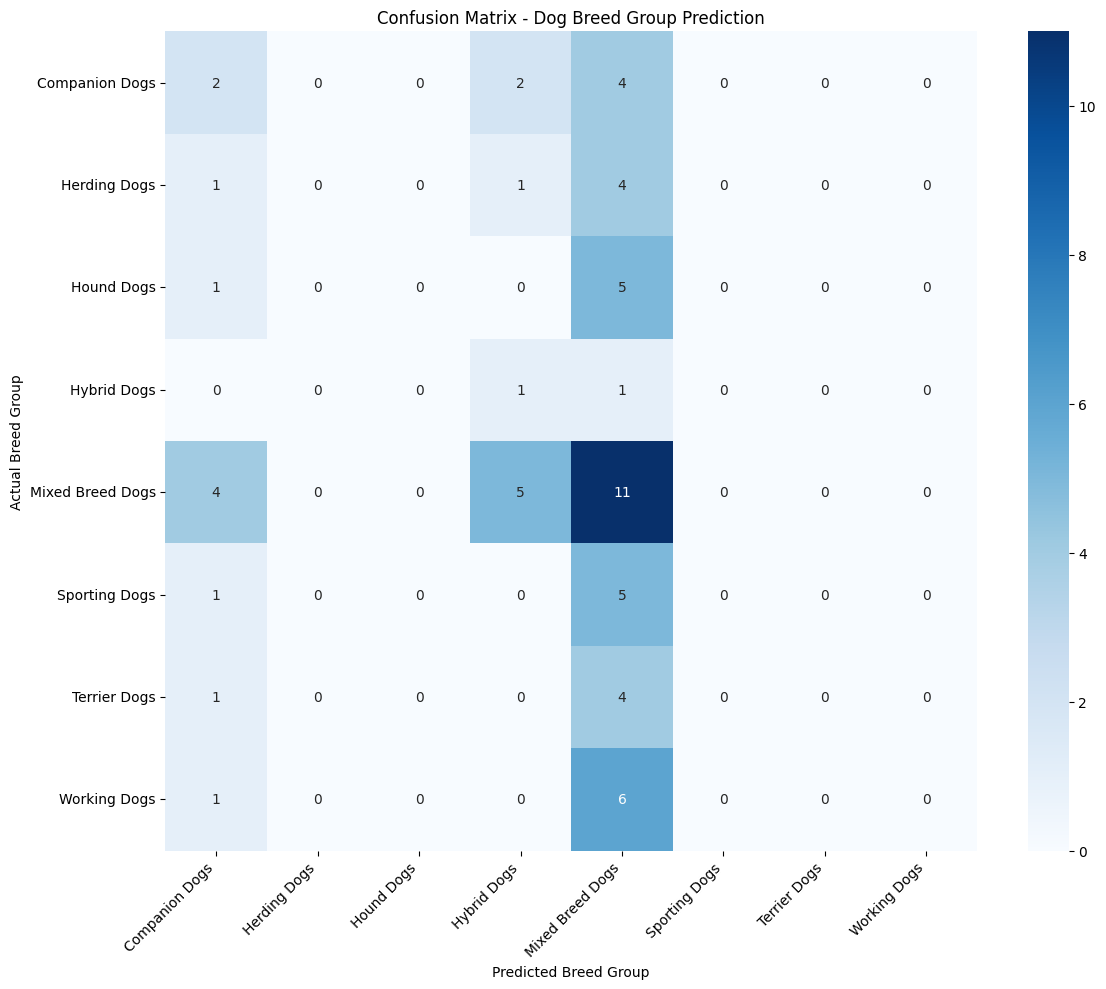


Classification Report:
                  precision    recall  f1-score   support

  Companion Dogs       0.18      0.25      0.21         8
    Herding Dogs       0.00      0.00      0.00         6
      Hound Dogs       0.00      0.00      0.00         6
     Hybrid Dogs       0.11      0.50      0.18         2
Mixed Breed Dogs       0.28      0.55      0.37        20
   Sporting Dogs       0.00      0.00      0.00         6
    Terrier Dogs       0.00      0.00      0.00         5
    Working Dogs       0.00      0.00      0.00         7

        accuracy                           0.23        60
       macro avg       0.07      0.16      0.09        60
    weighted avg       0.12      0.23      0.16        60


Accuracy per class:
Companion Dogs: 0.125
Herding Dogs: nan
Hound Dogs: nan
Hybrid Dogs: 0.500
Mixed Breed Dogs: 0.050
Sporting Dogs: nan
Terrier Dogs: nan
Working Dogs: nan

Overall Statistics:
Total test samples: 60
Correct predictions: 14
Wrong predictions: 46
Overall accu

In [353]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

# Make predictions on test set
y_pred = clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels
classes = sorted(y.unique())

# Create a larger figure for better readability
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Dog Breed Group Prediction')
plt.xlabel('Predicted Breed Group')
plt.ylabel('Actual Breed Group')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print classification report with zero_division parameter
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=classes, zero_division=0))

# Print accuracy per class
print("\nAccuracy per class:")
for i, class_name in enumerate(classes):
    if cm[i, :].sum() > 0:  # Avoid division by zero
        class_accuracy = cm[i, i] / cm[i, i] / cm[i, :].sum()
        print(f"{class_name}: {class_accuracy:.3f}")
    else:
        print(f"{class_name}: No samples in test set")

# Print overall statistics
print(f"\nOverall Statistics:")
print(f"Total test samples: {len(y_test)}")
print(f"Correct predictions: {cm.diagonal().sum()}")
print(f"Wrong predictions: {cm.sum() - cm.diagonal().sum()}")
print(f"Overall accuracy: {cm.diagonal().sum() / cm.sum():.3f}")

In [354]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)